In [1]:
from IPython.display import display,HTML
c1,f1,fs1='#00ff66','Wallpoet',20
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [2]:
dhtml('Code Modules')

In [3]:
import os,h5py,seaborn as sn
import pandas as pd,numpy as np
import tensorflow as tf,pylab as pl

In [4]:
dhtml('Functions')

In [5]:
def randi(nmin,nmax): 
    return np.random.randint(nmin,nmax)
def randch(a): 
    return np.random.choice(a,1)[0]
def randcoef():
    a=(.5+.000001*randi(1,999999))\
      *randch([-1,1])
    b=randi(3,10)
    c=.001*randi(1,99)*randch([-1,1])
    return a,b,c
def randcoord(a,b,c):
    t=np.arange(0,16*b*np.pi,1/(1440*b))
    fx=np.sin(t/6)+\
       a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+\
       a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    return fx,fy
def randcol():
    return [np.random.random(3)]

In [6]:
def randplot(idx,images,labels,targets):
    a,b,c=randcoef()
    if (idx+1)%10==0:
        print('*',end='',flush=True)
    labels[idx]=b
    targets[idx]=[a,c]
    fx,fy=randcoord(a,b,c)
    pl.figure(figsize=(4,4))
    ax=pl.gca(); ax.set_axis_off()
    pl.scatter(fx,fy,s=.1**4,c=randcol())
    pl.tight_layout(pad=.05)
    fn='%03d'%idx+'.png'
    pl.savefig(fn); pl.close()
    img=tf.image.decode_image(
        tf.io.read_file(fn))
    img=img.numpy()[:,:,:3]/255
    images[idx]=img
    os.remove(fn)
def data_file(n,h5f='ArtificialImages.h5'):
    images=np.zeros((n,288,288,3),dtype=np.float32)
    labels=np.zeros((n,),dtype=np.int32)
    targets=np.zeros((n,2),dtype=np.float32)
    for idx in range(n):
        randplot(idx,images,labels,targets)
    with h5py.File(h5f,'w') as f:
        f.create_dataset('images',data=images)
        f.create_dataset('labels',data=labels)
        f.create_dataset('targets',data=targets)
        f.close()
    print('\n'); print(os.stat(h5f))

In [7]:
def display_img(n):
    ns=np.random.randint(50)
    pl.figure(figsize=(10,10))
    ax=pl.gca(); ax.set_axis_off()
    ax.imshow(images[ns])
    ti='index: %s; '%ns+\
       'label: %s; '%classes[labels[ns]]+\
       'targets: %s'%str(targets[ns])
    pl.title(ti,fontsize=16); pl.show()
def display_images(n):
    fig=pl.figure(figsize=(10,10))
    randch=np.random\
    .choice(180,size=n,replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(3,n//3,i+1,
                           xticks=[],yticks=[])
        ax.imshow(images[idx])
        label=classes[labels[idx]]
        target=targets[idx]
        ax.set_title("{} \n({})"\
                     .format(label,target))
    pl.show()    

In [8]:
dhtml('Artificial Images')

In [9]:
data_file(180)

******************

os.stat_result(st_mode=33188, st_ino=131083, st_dev=1793, st_nlink=1, st_uid=0, st_gid=0, st_size=179163248, st_atime=1600089058, st_mtime=1600089058, st_ctime=1600089058)


In [10]:
with h5py.File('ArtificialImages.h5','r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[0]])
    labels=np.array(f[keys[1]])
    targets=np.array(f[keys[2]])
    f.close()

['images', 'labels', 'targets']


In [11]:
classes=list(set(labels))
num_classes=len(classes)
rd=dict(zip(classes,
            list(range(len(classes)))))
labels=np.array([rd.get(x,x) for x in labels],
                dtype=np.int32)
rd,classes,list(set(labels))

({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6},
 [3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6])

In [12]:
N=labels.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
images=images[shuffle_ids]
labels=labels[shuffle_ids]
targets=targets[shuffle_ids]

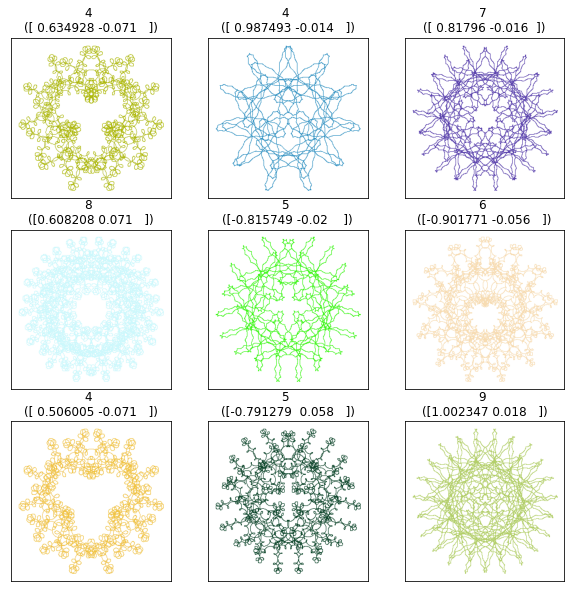

In [13]:
display_images(9)

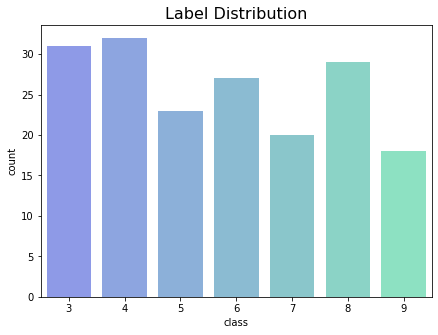

In [14]:
df=pd.DataFrame(labels,columns=['label'])
df['class']=[classes[l] for l in labels]
pl.figure(figsize=(7,5))
sn.countplot(x='class',data=df,
             palette='winter',alpha=.5)
ti='Label Distribution'
pl.title(ti,fontsize=16); 